In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Data

df = pd.read_csv('Data/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', index_col=False)

In [3]:
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


* The problem with this analysis is that we are calculating the Average Order Value (AOV) by using `order_amounts` which is the number of each item multiplied by its price. That's why we have such an unreasonable number ($3145.13) as an AOV.

In [5]:
# Feature engineering by using a function to calculate the price of each item

def single_order_amount(row):
    return row['order_amount'] / row['total_items']

In [6]:
# Applying the function to our data

df['Single_order_amount'] = df.apply(single_order_amount, axis=1)

In [7]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Single_order_amount
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [8]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,Single_order_amount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


In [9]:
df.Single_order_amount.mean()

387.7428

* As we can see the mean value for price is now reasonable since we are claculating the average amount by using the price of each item in our dataset


In [10]:
df.Single_order_amount.median()

153.0

* The main reason our average value for such an afordable item is still high ($387.74) is because of the outliers which exist in our dataset.

* Since for 75 percent of the data we have a price of $169 I'd rather use the Median than the mean value of the items

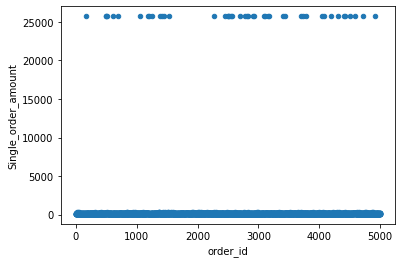

In [11]:
# Showing outliers

df.plot.scatter(x='order_id', y = 'Single_order_amount');